### 1.1 - Movielens full - EDA
Nu ska du ladda ned datasetet ml-latest.zip under sektionen "recommended for education and
development". Läs in dataseten "movies.csv" och "ratings.csv" besvara på följande frågorna neda

In [279]:
import pandas as pd 
import matplotlib.pyplot as plt

# movie and rating csv file path
movies = '../Labb/movie_data/movies.csv'
ratings = '../Labb/movie_data/ratings.csv'

# create a data frame for movies and ratings
df_movies  = pd.read_csv(movies)
df_ratings = pd.read_csv(ratings)
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [280]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,utan försök undersöka fler aspekter av datan.

In [281]:
df_movies.info() # 3 columns, 9742 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [282]:
df_movies.isnull().sum() # No missing values

movieId    0
title      0
genres     0
dtype: int64

In [283]:
df_movies.describe().T # print the summary of statistics

,count,mean,std,min,25%,50%,75%,max
movieId,9742.0,42200.353623,52160.494854,1.0,3248.25,7300.0,76232.0,193609.0


In [284]:
df_movies['genres'].nunique()

951

#### Number of movies per year

In [285]:
df_movies[['title', 'year']] = df_movies['title'].str.split('(', n=1, expand=True) # https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995)
1,2,Jumanji,Adventure|Children|Fantasy,1995)
2,3,Grumpier Old Men,Comedy|Romance,1995)
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995)
4,5,Father of the Bride Part II,Comedy,1995)


In [286]:
df_movies['year']= df_movies['year'].str.strip(')') # to remove ')' in year column
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [287]:
df_movies_per_year = df_movies.groupby(by='year')['title'].count()
df_movies_per_year

year
'A' gai waak) (1983                          1
'A' gai wak juk jap) (1987                   1
06) (1994                                    1
101 Reykjavík) (2000                         1
1903                                         1
                                            ..
École de la chair, L') (1998                 1
Être et avoir) (2002                         1
Ôdishon) (1999                               1
Ônibus 174) (2002                            1
Ôritsu uchûgun Oneamisu no tsubasa) (1987    1
Name: title, Length: 1186, dtype: int64

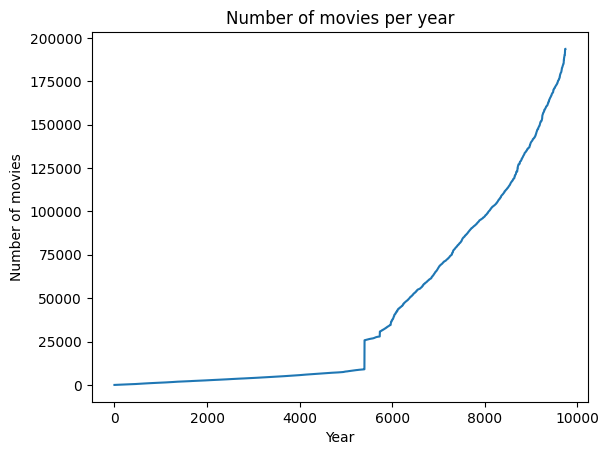

In [297]:
# Plot graphically
df_movies.plot(
    kind="line",
    xlabel="Year",
    ylabel="Number of movies",
    title="Number of movies per year",
    legend=False,
);


### Box plot for movies genres

In [289]:
df_movies['genres'].head() # geners with | so we have to split 

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [290]:
df_genres_list =df_movies['genres'].str.split('|') # spilt generes using str.split()
df_genres_list

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genres, Length: 9742, dtype: object

In [291]:
movies = [name for genres in df_genres_list for name in genres] # list the each genres from df_genereslist
movies # list of genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Adventure',
 'Children',
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 'Children',
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Adventure',
 'Animation',
 'Children',
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Crime',
 'Drama',
 'Drama',
 'Romance',
 'Comedy',
 'Comedy',
 'Action',
 'Comedy',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Crime',
 'Thriller',
 'Crime',
 'Drama',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Children',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Drama',
 'Fantasy',
 'Mystery',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'Children',
 'Drama',
 'Crime',
 'Drama',
 'Children',
 'Comedy',
 'Comedy',
 'Romance'

In [292]:
# list' object has no attribute 'value_count'-> so we need to convert list to pd.Series
movies_gen = pd.Series(movies).value_counts()
movies_gen

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

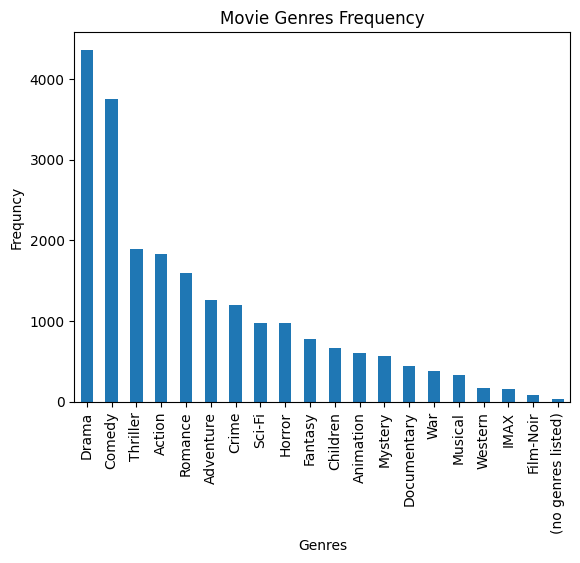

In [293]:
# To plot the movies genres using bar plot
movies_gen.plot(kind= 'bar', xlabel='Genres', ylabel='Frequncy', title='Movie Genres Frequency')
plt.show()

In [294]:
df_ratings.info() # 4 columns, 100836 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [295]:
df_ratings.describe().T # print summary of Statistics

,count,mean,std,min,25%,50%,75%,max
userId,100836.0,3.261276e+02,1.826185e+02,1.0,1.770000e+02,3.250000e+02,4.770000e+02,6.100000e+02
movieId,100836.0,1.943530e+04,3.553099e+04,1.0,1.199000e+03,2.991000e+03,8.122000e+03,1.936090e+05
rating,100836.0,3.501557e+00,1.042529e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,100836.0,1.205946e+09,2.162610e+08,828124615.0,1.019124e+09,1.186087e+09,1.435994e+09,1.537799e+09
